In [1]:
import pandas as pd
import numpy as np 

import matplotlib.pyplot as plt


In [2]:
import os

In [3]:
import librosa

In [4]:
import IPython.display as ipd
from scipy.io import wavfile
import warnings
warnings.filterwarnings("ignore")


In [5]:
train="C:/Users/Asus/Desktop/trainaudio/audio"

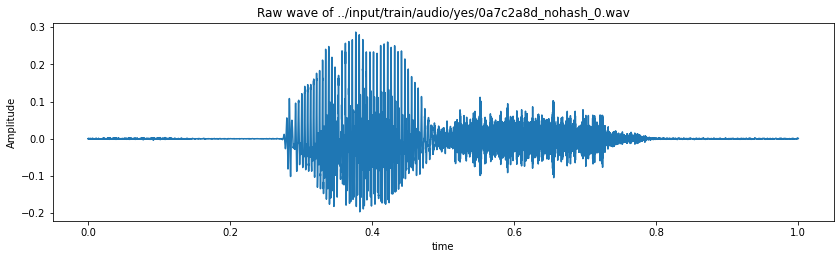

In [6]:
samples, sample_rate = librosa.load(train+'/yes/0a7c2a8d_nohash_0.wav', sr = 16000)
fig = plt.figure(figsize=(14, 8))
ax1 = fig.add_subplot(211)
ax1.set_title('Raw wave of ' + '../input/train/audio/yes/0a7c2a8d_nohash_0.wav')
ax1.set_xlabel('time')
ax1.set_ylabel('Amplitude')
ax1.plot(np.linspace(0, sample_rate/len(samples), sample_rate), samples)

In [7]:
ipd.Audio(samples, rate=sample_rate)


In [8]:
len(samples)

16000

In [9]:
samples=librosa.resample(samples,sample_rate,8000)

In [10]:
ipd.Audio(samples,rate=8000)


In [11]:
len(samples)

8000

In [12]:
labels=os.listdir(train)

In [13]:
labels

['bed',
 'bird',
 'cat',
 'dog',
 'down',
 'eight',
 'five',
 'four',
 'go',
 'happy',
 'house',
 'left',
 'marvin',
 'nine',
 'no',
 'off',
 'on',
 'one',
 'right',
 'seven',
 'sheila',
 'six',
 'stop',
 'three',
 'tree',
 'two',
 'up',
 'wow',
 'yes',
 'zero',
 '_background_noise_']

In [14]:
trainyes=os.listdir(train+'/'+'yes')

In [15]:
trainyes

['004ae714_nohash_0.wav',
 '004ae714_nohash_1.wav',
 '00f0204f_nohash_0.wav',
 '00f0204f_nohash_1.wav',
 '00f0204f_nohash_2.wav',
 '012c8314_nohash_0.wav',
 '0132a06d_nohash_0.wav',
 '0132a06d_nohash_1.wav',
 '0132a06d_nohash_2.wav',
 '0132a06d_nohash_3.wav',
 '0132a06d_nohash_4.wav',
 '0135f3f2_nohash_0.wav',
 '0135f3f2_nohash_1.wav',
 '0137b3f4_nohash_0.wav',
 '0137b3f4_nohash_1.wav',
 '0137b3f4_nohash_2.wav',
 '0137b3f4_nohash_3.wav',
 '0137b3f4_nohash_4.wav',
 '01648c51_nohash_0.wav',
 '01648c51_nohash_1.wav',
 '016e2c6d_nohash_0.wav',
 '019fa366_nohash_0.wav',
 '019fa366_nohash_1.wav',
 '01bb6a2a_nohash_0.wav',
 '01bb6a2a_nohash_1.wav',
 '01bb6a2a_nohash_2.wav',
 '01bb6a2a_nohash_3.wav',
 '01bb6a2a_nohash_4.wav',
 '01bcfc0c_nohash_0.wav',
 '01d22d03_nohash_0.wav',
 '01d22d03_nohash_1.wav',
 '01d22d03_nohash_2.wav',
 '022cd682_nohash_0.wav',
 '023808be_nohash_0.wav',
 '023a61ad_nohash_0.wav',
 '023a61ad_nohash_1.wav',
 '023a61ad_nohash_2.wav',
 '026290a7_nohash_0.wav',
 '02fcd241_n

In [16]:
recordings=[]
for label in labels:
    waves=[w for w in os.listdir(train+ '/'+ label) if w.endswith('.wav')]
    recordings.append(len(waves))

In [17]:
recordings

[1713,
 1731,
 1733,
 1746,
 2359,
 2352,
 2357,
 2372,
 2372,
 1742,
 1750,
 2353,
 1746,
 2364,
 2375,
 2357,
 2367,
 2370,
 2367,
 2377,
 1734,
 2369,
 2380,
 2356,
 1733,
 2373,
 2375,
 1745,
 2377,
 2376,
 6]

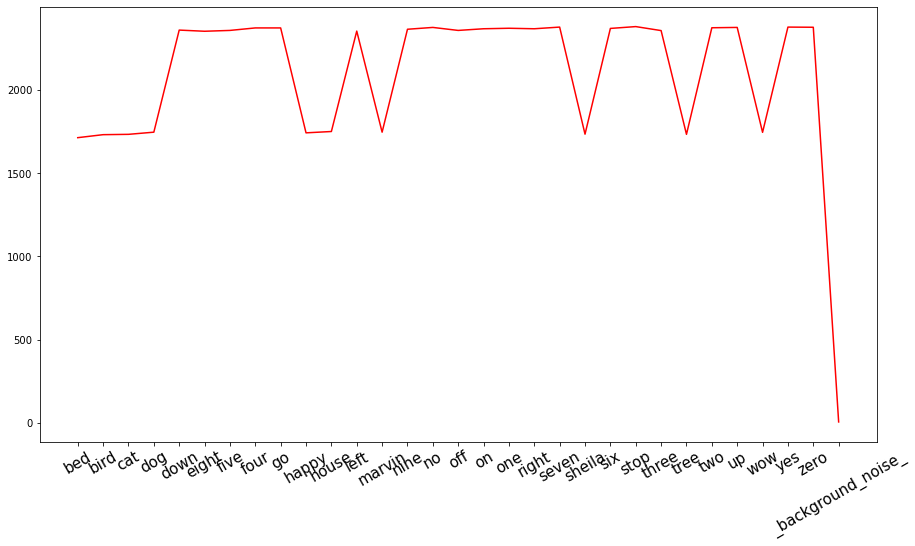

In [18]:
plt.figure(figsize=(15,8))
plt.plot(labels,recordings,'r')
plt.xticks(rotation=30,fontsize=15)
plt.show()

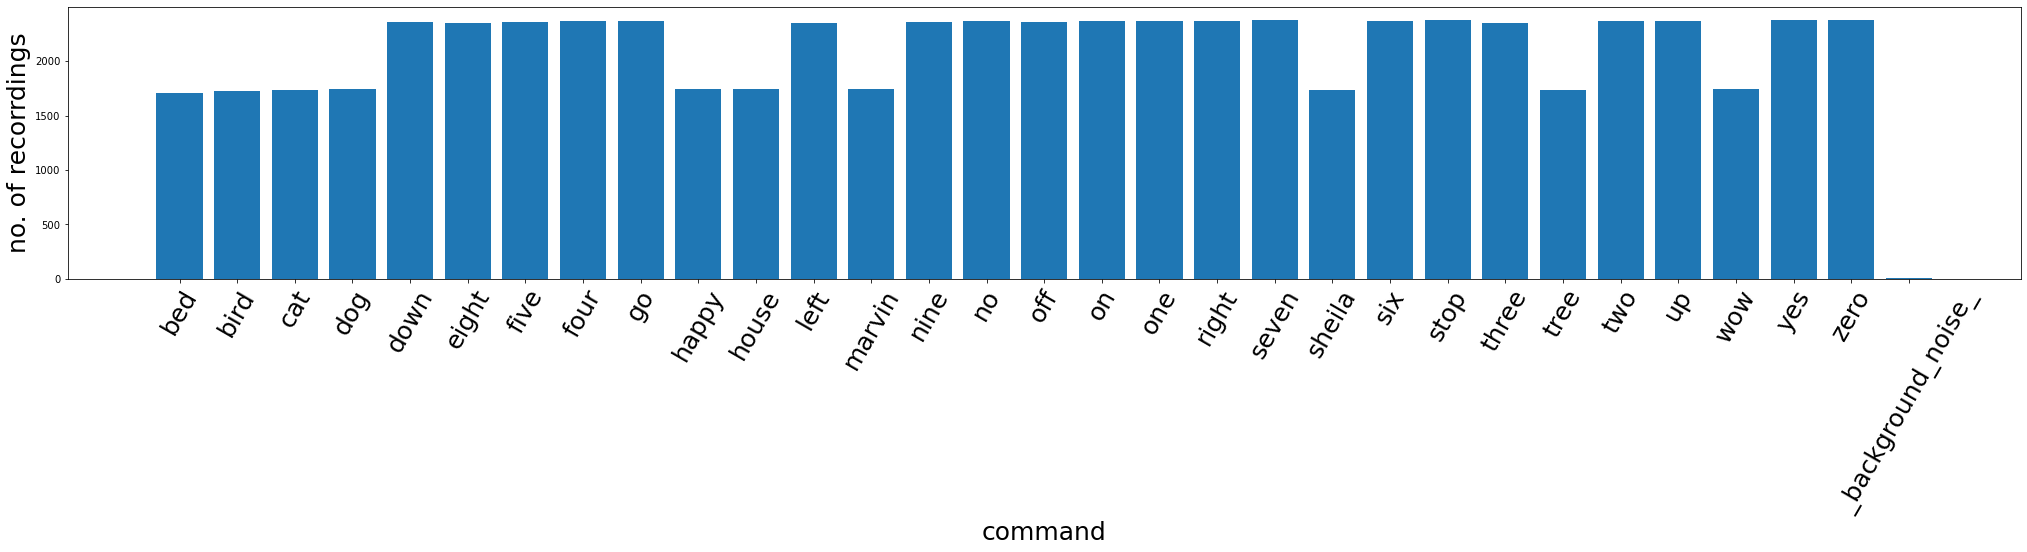

In [19]:
index=np.arange(len(labels))
plt.figure(figsize=(35,5))
plt.bar(index,recordings)
plt.xlabel('command',fontsize=25)
plt.ylabel('no. of recorrdings',fontsize=25)
plt.xticks(index,labels,fontsize=25,rotation=60)
plt.show()

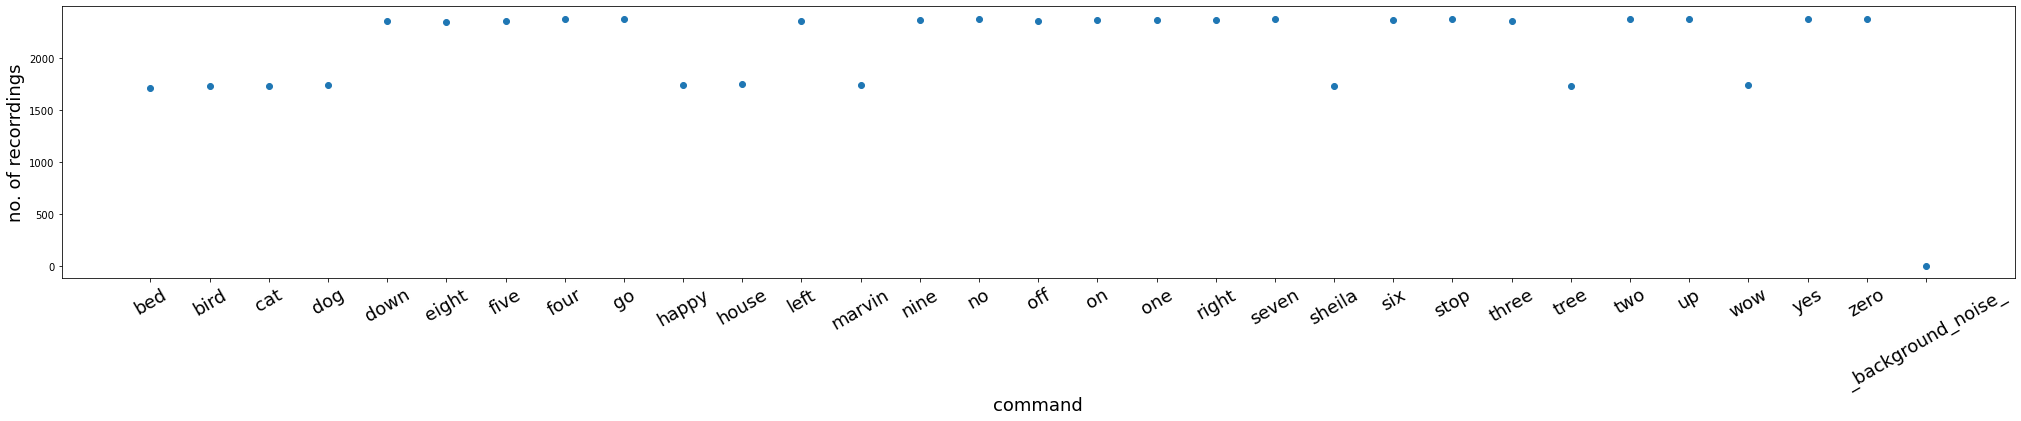

In [20]:
index=np.arange(len(labels))
plt.figure(figsize=(35,5))
plt.scatter(index,recordings)
plt.xlabel('command',fontsize=18)
plt.ylabel('no. of recorrdings',fontsize=18)
plt.xticks(index,labels,fontsize=18,rotation=30)
plt.show()

In [21]:
duration=[]
for label in labels:
    waves=(w for w in os.listdir(train + '/' +label) if w.endswith('.wav'))
    for wave in waves:
        sample_rate,samples=wavfile.read(train+'/'+label+'/'+wave)
        
        duration.append(float(len(samples)/sample_rate))

           

(0.0, 1.0)

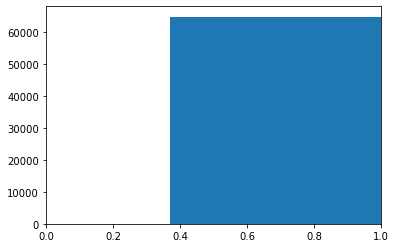

In [22]:
plt.hist(np.asarray(duration))
plt.xlim(0,1)

In [23]:
all_wave=[]
all_label=[]
for label in labels:
    waves=(w for w in os.listdir(train+'/'+label) if w.endswith('.wav'))
    for wave in waves:
        samples, sample_rate = librosa.load(train+ '/' + label + '/' + wave, sr = 16000)
        samples = librosa.resample(samples, sample_rate, 8000)
        if(len(samples)== 8000) : 
            all_wave.append(samples)
            all_label.append(label)
            
            
    

In [24]:
from sklearn.preprocessing import LabelEncoder

In [25]:
le=LabelEncoder()
y=le.fit_transform(all_label)


In [26]:
classes=list(le.classes_)

In [27]:
classes

['bed',
 'bird',
 'cat',
 'dog',
 'down',
 'eight',
 'five',
 'four',
 'go',
 'happy',
 'house',
 'left',
 'marvin',
 'nine',
 'no',
 'off',
 'on',
 'one',
 'right',
 'seven',
 'sheila',
 'six',
 'stop',
 'three',
 'tree',
 'two',
 'up',
 'wow',
 'yes',
 'zero']

In [28]:
from keras.utils import np_utils
y=np_utils.to_categorical(y, num_classes=len(labels))

Using TensorFlow backend.


In [29]:
all_wave = np.array(all_wave).reshape(-1,8000,1)

In [30]:
all_wave

array([[[ 3.9598257e-05],
        [ 1.6161166e-04],
        [ 3.2434524e-05],
        ...,
        [-2.1651715e-04],
        [-1.5615992e-04],
        [ 8.7151357e-06]],

       [[-3.0139782e-03],
        [-4.2778011e-03],
        [-3.6968826e-03],
        ...,
        [-3.5628441e-03],
        [-3.3570358e-03],
        [-4.0628943e-03]],

       [[-2.2046972e-04],
        [-3.3616464e-04],
        [-5.8407779e-04],
        ...,
        [ 4.0937547e-04],
        [ 3.8187529e-04],
        [ 4.2458469e-04]],

       ...,

       [[ 1.8180048e-05],
        [ 7.4798678e-05],
        [ 1.4849751e-04],
        ...,
        [ 2.4516109e-04],
        [ 2.8802510e-04],
        [ 3.2373212e-04]],

       [[-3.1226686e-05],
        [-1.9034118e-04],
        [-1.5712334e-04],
        ...,
        [-3.5548094e-04],
        [-3.9424302e-04],
        [-3.3154408e-04]],

       [[-6.4042950e-04],
        [-1.2604186e-03],
        [-1.0920790e-03],
        ...,
        [-1.1922952e-03],
        [-6.304

In [31]:
y

array([[1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 1., 0.]], dtype=float32)

In [32]:
y.shape

(58252, 31)

In [33]:
y[1]

array([1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
      dtype=float32)

In [34]:
from sklearn.model_selection import train_test_split

In [52]:
x_train,x_val,y_train,y_val=train_test_split(np.array(all_wave),np.array(y),stratify=y,test_size=0.2,random_state=42,shuffle=True)

In [36]:
import tensorflow as tf

In [41]:
model=tf.keras.Sequential([tf.keras.layers.Conv1D(8,13,padding='valid',activation='relu',strides=1,input_shape=(8000,1)),
                          tf.keras.layers.MaxPooling1D(3),
                          tf.keras.layers.Dropout(0.3),
                          tf.keras.layers.Conv1D(16, 11, padding='valid', activation='relu', strides=1),
tf.keras.layers.MaxPooling1D(3),
tf.keras.layers.Dropout(0.3),
tf.keras.layers.Conv1D(32, 9, padding='valid', activation='relu', strides=1),
tf.keras.layers.MaxPooling1D(3),
tf.keras.layers.Dropout(0.3),
tf.keras.layers.Conv1D(64, 7, padding='valid', activation='relu', strides=1),
tf.keras.layers.MaxPooling1D(3),
tf.keras.layers.Dropout(0.3),
tf.keras.layers.Flatten(),
tf.keras.layers.Dense(256, activation='relu'),
tf.keras.layers.Dropout(0.3),
tf.keras.layers.Dense(128, activation='relu'),
tf.keras.layers.Dropout(0.3),
tf.keras.layers.Dense(len(labels),activation=tf.nn.softmax)])


In [42]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [56]:
callback = [EarlyStopping(monitor='val_loss', patience=5,mode='min',verbose=1,min_delta=0.0001),
             ModelCheckpoint(filepath='best_model.h5', monitor='val_loss', save_best_only=True,verbose=1,mode='auto')]


In [48]:
from keras.callbacks import EarlyStopping, ModelCheckpoint

In [59]:
history=model.fit(x_train, y_train ,epochs=50, callbacks=callback, batch_size=32, validation_data=(x_val,y_val))

Train on 46601 samples, validate on 11651 samples
Epoch 1/50
46592/46601 [============================>.] - ETA: 0s - loss: 2.0253 - accuracy: 0.3618
Epoch 00001: val_loss improved from 2.18765 to 1.68493, saving model to best_model.h5
46601/46601 [==============================] - 193s 4ms/sample - loss: 2.0253 - accuracy: 0.3618 - val_loss: 1.6849 - val_accuracy: 0.4952
Epoch 2/50
46592/46601 [============================>.] - ETA: 0s - loss: 1.6451 - accuracy: 0.4880
Epoch 00002: val_loss improved from 1.68493 to 1.22555, saving model to best_model.h5
46601/46601 [==============================] - 200s 4ms/sample - loss: 1.6450 - accuracy: 0.4880 - val_loss: 1.2256 - val_accuracy: 0.6517
Epoch 3/50
46592/46601 [============================>.] - ETA: 0s - loss: 1.3890 - accuracy: 0.5744
Epoch 00003: val_loss improved from 1.22555 to 1.13997, saving model to best_model.h5
46601/46601 [==============================] - 195s 4ms/sample - loss: 1.3890 - accuracy: 0.5744 - val_loss: 1.140

46592/46601 [============================>.] - ETA: 0s - loss: 0.6811 - accuracy: 0.7922
Epoch 00027: val_loss did not improve from 0.59920
46601/46601 [==============================] - 207s 4ms/sample - loss: 0.6810 - accuracy: 0.7922 - val_loss: 0.6555 - val_accuracy: 0.8012
Epoch 28/50
46592/46601 [============================>.] - ETA: 0s - loss: 0.6722 - accuracy: 0.7950
Epoch 00028: val_loss did not improve from 0.59920
46601/46601 [==============================] - 199s 4ms/sample - loss: 0.6723 - accuracy: 0.7950 - val_loss: 0.6015 - val_accuracy: 0.8210
Epoch 29/50
46592/46601 [============================>.] - ETA: 0s - loss: 0.6671 - accuracy: 0.7973
Epoch 00029: val_loss did not improve from 0.59920
46601/46601 [==============================] - 233s 5ms/sample - loss: 0.6671 - accuracy: 0.7973 - val_loss: 0.6034 - val_accuracy: 0.8204
Epoch 30/50
46592/46601 [============================>.] - ETA: 0s - loss: 0.6597 - accuracy: 0.7968
Epoch 00030: val_loss did not improve 

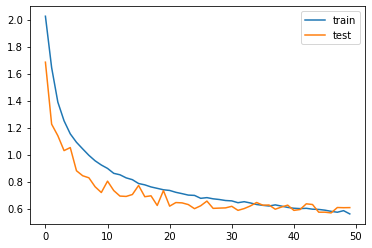

In [155]:
from matplotlib import pyplot 
pyplot.plot(history.history['loss'], label='train') 
pyplot.plot(history.history['val_loss'], label='test') 
pyplot.legend() 
pyplot.show()

# Testing the model on my own voice

In [166]:
import sounddevice as sd
from scipy.io.wavfile import write

fs = 16000  # Sample rate
seconds = 1 # Duration of recording

myrecording = sd.rec(int(seconds * fs), samplerate=fs, channels=1)
sd.wait()  # Wait until recording is finished
write('output3.wav', fs, myrecording)  # Save as WAV file 

In [167]:
def predict(audio):
    prob=model.predict(audio.reshape(1,8000,1))
    index=np.argmax(prob)
    return classes[index]

In [168]:
samples1, sample_rate1 = librosa.load('C:/Users/Asus/Desktop/output3.wav', sr = 8000)
samples1 = librosa.resample(samples1, sample_rate1, 8000)


In [169]:
len(samples1)


8000

In [170]:
len(myrecording)

16000

In [171]:
sample_rate1

8000

In [172]:
ipd.Audio(samples1,rate=8000)  

predict(samples1)

'yes'

# test your voice here

In [ ]:
fs = 16000  # Sample rate
seconds = 1 # Duration of recording

myrecording = sd.rec(int(seconds * fs), samplerate=fs, channels=1)
sd.wait()  # Wait until recording is finished
write('voice1.wav', fs, myrecording)  # Save as WAV file 


In [ ]:
samples1, sample_rate1 = librosa.load('C:/Users/Asus/ML and DL - Copy/voice1.wav', sr = 8000)
samples1 = librosa.resample(samples1, sample_rate1, 8000)
ipd.Audio(samples1,rate=8000)  

predict(samples1)
